In [1]:
import pandas as pd
from mplsoccer.pitch import Pitch, VerticalPitch
from mplsoccer import FontManager

In [2]:
df = pd.read_csv("events.csv")

In [3]:
defense = pd.read_csv("defense.csv")

In [4]:
defense['X2'] = defense['X']*1.2
defense['Y2'] = defense['Y']*.8

In [5]:
defense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    19 non-null     object 
 1   Player  19 non-null     object 
 2   Event   19 non-null     object 
 3   Mins    19 non-null     int64  
 4   Secs    19 non-null     int64  
 5   X       19 non-null     int64  
 6   Y       19 non-null     int64  
 7   X2      19 non-null     float64
 8   Y2      19 non-null     float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.5+ KB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Team    54 non-null     object
 1   Player  54 non-null     object
 2   Event   54 non-null     object
 3   Mins    54 non-null     int64 
 4   Secs    54 non-null     int64 
 5   X       54 non-null     int64 
 6   Y       54 non-null     int64 
 7   X2      54 non-null     object
 8   Y2      54 non-null     object
dtypes: int64(4), object(5)
memory usage: 3.9+ KB


In [7]:
shot_indices = df[df['Event']=='Shot'].index

In [8]:
shot_indices

Int64Index([4, 7, 10, 13, 14, 17, 21, 24, 25, 26, 28, 30, 33, 34, 39, 42, 45,
            47, 50, 53],
           dtype='int64')

In [9]:
goals = []
shot = []
for curr in range(len(df)):
    
    if curr in shot_indices:
        shot_data = (df['X'].iloc[curr], df['Y'].iloc[curr])
        shot.append(shot_data)
        goals.append(shot)
        shot = []
    
    else:
        shot_data = (df['X'].iloc[curr], df['Y'].iloc[curr])
        shot.append(shot_data)

In [10]:
shot_types = []
action = []
for curr in range(len(df)):

    if curr in shot_indices:
        action.append(df['Event'].iloc[curr])
        shot_types.append(action)
        action = []
    else:
        action.append(df['Event'].iloc[curr])
        

In [11]:
len(shot_types)

20

In [12]:
len(goals)

20

In [13]:
len(df[df['Event']=='Shot'])

20

In [14]:
goals

[[(75, 17), (81, 18), (88, 37), (89, 41), (91, 41)],
 [(73, 18), (85, 17), (91, 35)],
 [(60, 9), (79, 28), (87, 37)],
 [(68, 19), (79, 55), (86, 65)],
 [(83, 43)],
 [(79, 56), (83, 62), (87, 59)],
 [(54, 68), (75, 38), (82, 37), (87, 38)],
 [(76, 50), (79, 50), (86, 54)],
 [(87, 39)],
 [(86, 64)],
 [(76, 54), (87, 56)],
 [(85, 49), (87, 38)],
 [(90, 69), (89, 68), (88, 61)],
 [(89, 43)],
 [(76, 9), (88, 15), (91, 26), (89, 32), (90, 33)],
 [(57, 9), (76, 24), (88, 31)],
 [(60, 24), (77, 29), (87, 36)],
 [(67, 22), (90, 33)],
 [(62, 24), (82, 45), (86, 43)],
 [(60, 50), (83, 42), (87, 38)]]

In [15]:
shot_types

[['touch', 'Dribble', 'Dribble', 'Dribble', 'Shot'],
 ['Run', 'touch', 'Shot'],
 ['Run', 'touch', 'Shot'],
 ['Run', 'touch', 'Shot'],
 ['Shot'],
 ['touch', 'Dribble', 'Shot'],
 ['Run', 'touch', 'touch', 'Shot'],
 ['touch', 'Dribble', 'Shot'],
 ['Shot'],
 ['Shot'],
 ['touch', 'Shot'],
 ['Run', 'Shot'],
 ['touch', 'Dribble', 'Shot'],
 ['Shot'],
 ['Dribble', 'Dribble', 'Dribble', 'Dribble', 'Shot'],
 ['Run', 'touch', 'Shot'],
 ['Run', 'touch', 'Shot'],
 ['Run', 'Shot'],
 ['Run', 'touch', 'Shot'],
 ['Run', 'touch', 'Shot']]

In [16]:
import matplotlib.pyplot as plt

In [17]:
from matplotlib.patches import Arc

In [19]:
df['X2']=df['X']*1.2
df['Y2']=df['Y']*.8

In [20]:
df

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,Home,H10,touch,0,12,75,17,90.0,13.6
1,Home,H10,Dribble,0,13,81,18,97.2,14.4
2,Home,H10,Dribble,0,16,88,37,105.6,29.6
3,Home,H10,Dribble,0,17,89,41,106.8,32.8
4,Home,H10,Shot,0,18,91,41,109.2,32.8
5,Home,H10,Run,0,27,73,18,87.6,14.4
6,Home,H10,touch,0,29,85,17,102.0,13.6
7,Home,H10,Shot,0,31,91,35,109.2,28.0
8,Home,H10,Run,0,37,60,9,72.0,7.2
9,Home,H10,touch,0,41,79,28,94.8,22.4


In [21]:
height = defense['X2'].mean()
print(height)
diff = 120-height
print(diff)
adj_height = (105*diff)/120
print(adj_height)

89.30526315789474
30.694736842105257
26.857894736842102


In [22]:
from mplsoccer import Pitch

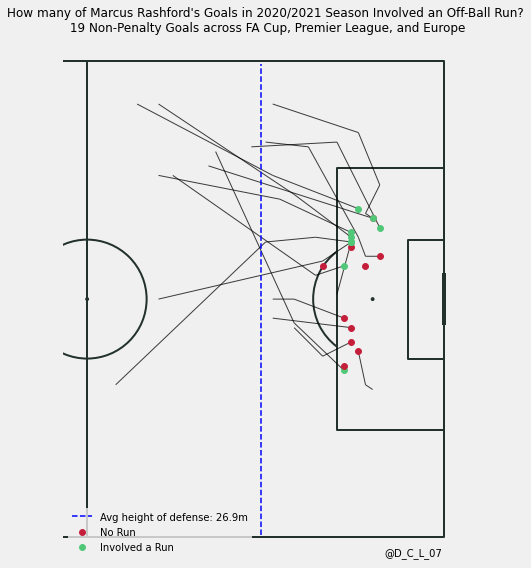

In [25]:
pitch = Pitch(half=True, pitch_type='statsbomb', pitch_color='#F0F0F0', line_color='#22312b')
fig, ax = pitch.draw(figsize=(12, 8), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#F0F0F0')
for i in range(len(shot_indices)):
    if i == 0:
        curr = df.iloc[0:shot_indices[i]+1]
    else:
        curr = df.iloc[shot_indices[i-1]+1:shot_indices[i]+1]
    for j in range(len(curr)):
        # if its at shot just plot the point
        if j == len(curr)-1:
            if 'Run' in curr['Event'].tolist():
                pitch.scatter(curr['X2'].iloc[j], curr['Y2'].iloc[j], s=35, ax=ax, color='#50C878', zorder=5, 
                             label='Involved a Run')
            else:
                pitch.scatter(curr['X2'].iloc[j], curr['Y2'].iloc[j], s=35, ax=ax, color='#C41E3A', zorder=5, 
                             label='No Run')
        else:
            pitch.lines(curr['X2'].iloc[j], curr['Y2'].iloc[j], curr['X2'].iloc[j+1], curr['Y2'].iloc[j+1],
                        lw=1, ax=ax, color='black', alpha=0.75)

    
ax.axvline(x = height, color = 'b', label = 'Avg height of defense: 26.9m', ymin=0.05, ymax=0.95, linestyle='--')
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='lower left', edgecolor='None', facecolor='#F0F0F0')         
ax.set_title("How many of Marcus Rashford's Goals in 2020/2021 Season Involved an Off-Ball Run?\n 19 Non-Penalty Goals across FA Cup, Premier League, and Europe", fontsize=12)
ax.text(110, 83, '@D_C_L_07', fontsize=10)
fig.savefig(fname='rashford_goals.png', facecolor='#F0F0F0', dpi=300)

Average line of initial defense: the average position of the defender closest to the opponents goal


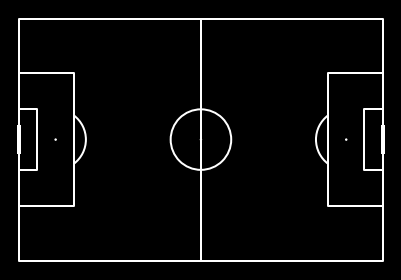

In [5]:
pitch = Pitch(half=False, pitch_color='black', line_color='white')
fig, ax = pitch.draw()
fig.set_facecolor('black')
fig.savefig(fname='pitch.png')